#### imports 

In [12]:
import pandas as pd
import json
import seaborn as sns
from scipy import stats
import numpy as np
import time
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

True

In [13]:
def load_json(filename):
    data = []
    with open(filename, 'r') as f:
        for r in f.readlines():
            r_json = json.loads(r)
            if r_json['row'][4]['buyer']=='0x0000000000000000000000000000000000000000':
                continue
            else:
                data.append(r_json)
    print("amount of data %i"  % len(data))
    return data

In [4]:
original_df = pd.read_csv("/Users/haaroony/OneDrive - Pometry Ltd/nft_andrea/results/Data_API_clean_nfts_ETH_only.csv")

/var/folders/rm/nnz28pc96cv2xqzbwlwvwl2r0000gn/T/ipykernel_26892/3462050004.py:1: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("/Users/haaroony/OneDrive - Pometry Ltd/nft_andrea/results/Data_API_clean_nfts_ETH_only.csv")


In [ ]:
t = max(original_df['Datetime_updated_seconds'])
time.mktime(time.strptime(t, '%Y-%m-%d %H:%M:%S'))

In [32]:
original_df[original_df['Transaction_hash'].isin(hashes)].to_csv("/Users/haaroony/OneDrive - Pometry Ltd/nft_andrea/results/cryptokitty_test.csv", index=False)

In [33]:
t = max(original_df[original_df['Transaction_hash'].isin(hashes)]['Datetime_updated_seconds'])
time.mktime(time.strptime(t, '%Y-%m-%d %H:%M:%S'))

1554688350.0

### Read data

In [34]:
data = load_json('/Users/haaroony/OneDrive - Pometry Ltd/nft_andrea/results/cycles_profits_150722.json')

amount of data 16673


## Find longest cycle

In [35]:
longest_data  = data[0]
for row in data:
    if len(row['row'][4]['cycle']['sales']) > len(longest_data['row'][4]['cycle']['sales']):
        longest_data = row
print("cycle found %i" % len(longest_data['row'][4]['cycle']['sales']))

cycle found 206


In [46]:
print("size of chain")
len(longest_data['row'][4]['cycle']['sales'])

size of chain


206

In [51]:
from collections import Counter
Counter([sale['buyer'] for sale in longest_data['row'][4]['cycle']['sales']])

Counter({'0xe738725cdcc41c91f734dd7b5b9659df994d6dda': 2,
         '0xbabda06088c242fb2a763aa7cc99706cb77ba735': 9,
         '0x463215edb66fb6a8f0c979e739a731977617699f': 7,
         '0x8acc1421ec98689461ff5777de8ad6648dc6d643': 15,
         '0x7316e9cf94bef40d4981d66a5c41c38b6b32454c': 11,
         '0xf5aee6d7b838d5ede8aa65d31dbc11116545180c': 16,
         '0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee': 16,
         '0x6a47b60c377450a460d3eb828d534ee66eead668': 14,
         '0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28': 12,
         '0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a': 15,
         '0x87b77fabfeb869150b8e1b9462603f9a639c5fae': 15,
         '0xa21e0974137bf8400eb7dca606d9dcb190d79ed9': 12,
         '0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8': 13,
         '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c': 5,
         '0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62': 6,
         '0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8': 9,
         '0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04': 10,
   

In [42]:
longest_data['row'][4]['cycle']['sales'][-1]['time'], longest_data['row'][4]['cycle']['sales'][0]['time'], (longest_data['row'][4]['cycle']['sales'][-1]['time']-longest_data['row'][4]['cycle']['sales'][0]['time'])/60

(1554691950, 1550901539, 63173.51666666667)

Not suspicious?

#### Most profitable NFT cycles

In [52]:
profitable_trades = np.array([x['row'][4]['profit_usd'] for x in data])

In [54]:
print("Max profit %s" % profitable_trades.max())
print("Min profit %s" % profitable_trades.min())

Max profit 59220.018
Min profit 6.697753462958644e-12


#### frequency of profits

highly skewed

In [70]:
profits = [trade['row'][4]['profit_usd'] for trade in data]

In [75]:
np.std(profits), min(profits), max(profits), len(profits)

(1141.993050903458, 6.697753462958644e-12, 59220.018, 16673)

In [87]:
np.mean(profits), stats.trim_mean(profits, 0.05), stats.trim_mean(profits, 0.10), stats.trim_mean(profits, 0.25)

(118.17145378028405, 14.269678921028847, 5.234855907639334, 2.031706742531798)

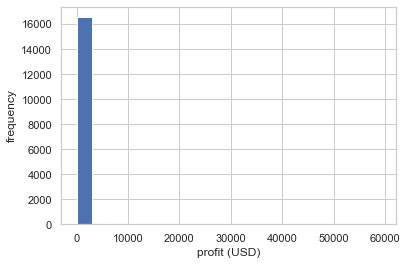

In [98]:
plt.hist(profits, bins=20)
plt.xlabel("profit (USD)")
plt.ylabel("frequency")
plt.savefig("frequency_profits.png")

In [100]:
# trim top and bottom 5%
trimmed_profits = stats.trimboth(profits, 0.05)

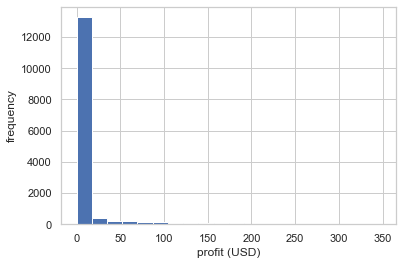

In [110]:
plt.hist(trimmed_profits, bins=20)
plt.xlabel("profit (USD)")
plt.ylabel("frequency")
plt.savefig("/Users/haaroony/OneDrive - Pometry Ltd/raphtory.github.io/_posts/frequency_profits_trimmed.png")

#### how much of the nfts appreciated the most in the cycle

In [138]:
print("min %.4f, max %.4f, amt %i" % (min(profits), max(profits), len(profits)))
value = 80 # USD
(len([_ for _ in profits if _ <= value])/len(profits)) * 100

min 0.0000, max 59220.0180, amt 16673


90.04378336232232

In [ ]:
# sns_plot.figure.savefig("output.png")

In [ ]:
# the histogram of the data

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(profitable_trades, ax=ax[0])
sns.distplot(np.log(profitable_trades), ax=ax[1])
ax[1].set_xscale("log")
plt.show()

# Highest Cost Cycles

Top 5 NFTs that appreciated the most

In [145]:
trade

{'timestamp': 1619562578,
 'window': None,
 'row': ['978681_Cryptokittie',
  'Cryptokittie',
  'Art',
  2,
  {'buyer': '0x936050fa536e1ac52e7034ac75f013b69b8f0b24',
   'profit_usd': 3.3985655104166663,
   'cycle': {'sales': [{'buyer': '0x936050fa536e1ac52e7034ac75f013b69b8f0b24',
      'price_usd': 3.00064,
      'time': 1536695960,
      'tx_hash': '0x2cee1845f8544f7a091d3f45792780828efa2dbe20f7c6e76eb6c97e2ed56af8',
      'nft_id': '978681_Cryptokittie'},
     {'buyer': '0x936050fa536e1ac52e7034ac75f013b69b8f0b24',
      'price_usd': 6.3992055104166665,
      'time': 1536936433,
      'tx_hash': '0x1a460dc25f6809e66ae18ce0cf0c4f28dc6f0e993ef6c1e15b79b27c6cf0322b',
      'nft_id': '978681_Cryptokittie'}]}}]}

In [213]:
def pretty_cycle(cycle):
    as_string = '   '
    prev_price = cycle[0]['price_usd']
    prev_time = cycle[0]['time']
    for item in cycle:
        diff = item['price_usd']-prev_price
        time_secs = item['time']-prev_time
        time_mins = time_secs/60
        time_hours = time_secs/60/60
        time_days = time_secs/60/60/24 
        prev_time = item['time']
        time_str = '%.1fm/%.1fh/%.2fd' % (time_mins, time_hours, time_days)
        as_string += 'T(d) '+time_str+', B: '+item['buyer'][:4]+'.. $'+str(item['price_usd'])+'('+str(diff)+') '+item['tx_hash']+'\n->'
    as_string = as_string[:-3]
    print(as_string)
pretty_cycle(all_profits_sorted[0]['cycle'])

   T(d) 0.0m/0.0h/0.00d, B: 0x87.. $56942.325(0.0) 0x8530cee364e3aa98c5c1c4cef849dbe0780dfdb8d9a9b4674d22837028312084
->T(d) 10.5m/0.2h/0.01d, B: 0x89.. $1138.8465000000006(-55803.4785) 0xb805851908065988cb9c1747c8693e396d22432024e951b5133be7ff5ea8053a
->T(d) 26.5m/0.4h/0.02d, B: 0x93.. $4555.386000000001(-52386.939) 0x5cd83126cc066245a1da552c7f6f97f0537ac8d705838d1010f74432cdd8c6fd
->T(d) 3.3m/0.1h/0.00d, B: 0x49.. $113.88465(-56828.44035) 0xa2de576299276233ce73cc62494f93150c0efbda23ffaf9be80a5e75ba88a378
->T(d) 7.2m/0.1h/0.01d, B: 0xd3.. $113.88465(-56828.44035) 0x14f8867198a82fb96bc63a4eff8dcce46d49a17ef92200b2bf89d17d2a9dfb92
->T(d) 0.0m/0.0h/0.00d, B: 0x42.. $341.65395(-56600.67105) 0x2f6ef591fb1a2da6a8a27edc56b088ab9104aa77063099cfb72d82e67125eb99
->T(d) 10.4m/0.2h/0.01d, B: 0x87.. $116162.343(59220.018) 0x6401d73024c774a98789d7745fd7e70eeb8b43f86ede0d64438409e83023e5eb


In [150]:
profits = [trade['row'][4]['profit_usd'] for trade in data]
all_profits_sorted = []
for trade in data:
    new_trade = {
        'profit_usd': trade['row'][4]['profit_usd'],
        'buyer':  trade['row'][4]['buyer'],
        'cycle_size': trade['row'][3],
        'nft_id': trade['row'][0],
        'cycle': trade['row'][4]['cycle']['sales']
    }
    all_profits_sorted.append(new_trade)
all_profits_sorted = sorted(all_profits_sorted, key=lambda d: d['profit_usd'], reverse=True)

In [181]:
all_profits_sorted[0]

{'profit_usd': 59220.018,
 'buyer': '0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10',
 'cycle_size': 7,
 'nft_id': '6929_Rari',
 'cycle': [{'buyer': '0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10',
   'price_usd': 56942.325,
   'time': 1599679592,
   'tx_hash': '0x8530cee364e3aa98c5c1c4cef849dbe0780dfdb8d9a9b4674d22837028312084',
   'nft_id': '6929_Rari'},
  {'buyer': '0x896b94f4f27f12369698c302e2049cae86936bbb',
   'price_usd': 1138.8465000000006,
   'time': 1599680220,
   'tx_hash': '0xb805851908065988cb9c1747c8693e396d22432024e951b5133be7ff5ea8053a',
   'nft_id': '6929_Rari'},
  {'buyer': '0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea',
   'price_usd': 4555.386000000001,
   'time': 1599681810,
   'tx_hash': '0x5cd83126cc066245a1da552c7f6f97f0537ac8d705838d1010f74432cdd8c6fd',
   'nft_id': '6929_Rari'},
  {'buyer': '0x490697b59520cfa81938df18b4634081556d3d15',
   'price_usd': 113.88465,
   'time': 1599682010,
   'tx_hash': '0xa2de576299276233ce73cc62494f93150c0efbda23ffaf9be80a5e75ba88a378',
 

In [201]:
for trade in all_profits_sorted[:5]:
    print("B: %s, PROFIT %.3f, HOPS %i" % (trade['buyer'][:5],trade['profit_usd'], trade['cycle_size']))
    pretty_cycle(trade['cycle'])
    print()

B: 0x879, PROFIT 59220.018, HOPS 7
   0.0 hrs, B: 0x87.. $56942.325(0.0) 0x8530cee364e3aa98c5c1c4cef849dbe0780dfdb8d9a9b4674d22837028312084
->0.17444444444444446 hrs, B: 0x89.. $1138.8465000000006(-55803.4785) 0xb805851908065988cb9c1747c8693e396d22432024e951b5133be7ff5ea8053a
->0.6161111111111112 hrs, B: 0x93.. $4555.386000000001(-52386.939) 0x5cd83126cc066245a1da552c7f6f97f0537ac8d705838d1010f74432cdd8c6fd
->0.6716666666666666 hrs, B: 0x49.. $113.88465(-56828.44035) 0xa2de576299276233ce73cc62494f93150c0efbda23ffaf9be80a5e75ba88a378
->0.7925 hrs, B: 0xd3.. $113.88465(-56828.44035) 0x14f8867198a82fb96bc63a4eff8dcce46d49a17ef92200b2bf89d17d2a9dfb92
->0.7927777777777778 hrs, B: 0x42.. $341.65395(-56600.67105) 0x2f6ef591fb1a2da6a8a27edc56b088ab9104aa77063099cfb72d82e67125eb99
->0.9663888888888889 hrs, B: 0x87.. $116162.343(59220.018) 0x6401d73024c774a98789d7745fd7e70eeb8b43f86ede0d64438409e83023e5eb

B: 0xb16, PROFIT 49936.400, HOPS 3
   0.0 hrs, B: 0xb1.. $47512.0(0.0) 0x5f070ac611b997e4a

### Delete all rari token cycles

In [196]:
all_profits_sorted_no_rari = []
for trade in data:
    if '_Rari' in trade['row'][0] or trade['row'][3] <= 2:
        continue
    new_trade = {
        'profit_usd': trade['row'][4]['profit_usd'],
        'buyer':  trade['row'][4]['buyer'],
        'cycle_size': trade['row'][3],
        'nft_id': trade['row'][0],
        'cycle': trade['row'][4]['cycle']['sales']
    }
    all_profits_sorted_no_rari.append(new_trade)
all_profits_sorted_no_rari = sorted(all_profits_sorted_no_rari, key=lambda d: d['profit_usd'], reverse=True)

In [214]:
for trade in all_profits_sorted_no_rari[:5]:
    print("B: %s, PROFIT %.3f, HOPS %i" % (trade['buyer'][:5],trade['profit_usd'], trade['cycle_size']))
    pretty_cycle(trade['cycle'])
    print()

B: 0xb16, PROFIT 49936.400, HOPS 3
   T(d) 0.0m/0.0h/0.00d, B: 0xb1.. $47512.0(0.0) 0x5f070ac611b997e4a87696ce962cbfd6798eb600c941895e0488273c69aea5b9
->T(d) 32128.7m/535.5h/22.31d, B: 0x8e.. $80190.9(32678.899999999994) 0x905ed48693a03d5258546e97b4485daa44c7d789ee493d91b67e6e80e049ea0c
->T(d) 8561.3m/142.7h/5.95d, B: 0xb1.. $97448.4(49936.399999999994) 0x3c9d576d6a16b0c8705765eca1f2abdbb184e63bd815d656d6724a35786d367e

B: 0xef7, PROFIT 12606.265, HOPS 3
   T(d) 0.0m/0.0h/0.00d, B: 0xef.. $51233.07499999999(0.0) 0x3d9f15234fe1348ff17d1f8118e6405c8ae1b2c0c87e25a588e95f68c3ff498e
->T(d) 48071.5m/801.2h/33.38d, B: 0x00.. $47406.62100000001(-3826.4539999999834) 0x69f1eea5568cfd217d8e3d6c7ae601e34c9af905feb6249ac510741b62f0a3c4
->T(d) 12.9m/0.2h/0.01d, B: 0xef.. $63839.34(12606.265000000007) 0x941a42df26a585af6aafa0720ea315213333c15f9ab6ae72947e047fd03ed0de

B: 0x107, PROFIT 11245.599, HOPS 3
   T(d) 0.0m/0.0h/0.00d, B: 0x10.. $5122.584299999999(0.0) 0xeda7207b6d1ced6e3eb34cecd07ccb0129cebf

## Traders that made the most on average per cycle

In [216]:
all_profits_sorted_no_rari[0]

{'profit_usd': 49936.399999999994,
 'buyer': '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd',
 'cycle_size': 3,
 'nft_id': '8033_Cryptopunk',
 'cycle': [{'buyer': '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd',
   'price_usd': 47512.0,
   'time': 1613663309,
   'tx_hash': '0x5f070ac611b997e4a87696ce962cbfd6798eb600c941895e0488273c69aea5b9',
   'nft_id': '8033_Cryptopunk'},
  {'buyer': '0x8ee483a4c53eb4b1da23da5448c884f6e7a09dbb',
   'price_usd': 80190.9,
   'time': 1615591029,
   'tx_hash': '0x905ed48693a03d5258546e97b4485daa44c7d789ee493d91b67e6e80e049ea0c',
   'nft_id': '8033_Cryptopunk'},
  {'buyer': '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd',
   'price_usd': 97448.4,
   'time': 1616104709,
   'tx_hash': '0x3c9d576d6a16b0c8705765eca1f2abdbb184e63bd815d656d6724a35786d367e',
   'nft_id': '8033_Cryptopunk'}]}

In [218]:
traders_avg

{'0xb166dd9d114c59774a13c3291e7d50ec74f23dfd': {'avg': 49936.399999999994,
  'count': 1},
 '0xef784caf2d2001fb8fbb9678f9a0a1b83cd582dc': {'avg': 12606.265000000007,
  'count': 1},
 '0x10725af1f2919d0acc5cf294285d97710f980490': {'avg': 11245.5986, 'count': 1},
 '0x08ceb8bba685ee708c9c4c65576837cbe19b9dea': {'avg': 5544.701499999998,
  'count': 1},
 '0x1e3934ea7e416f4e2bc5f7d55ae9783da0061475': {'avg': 2692.622739780454,
  'count': 2},
 '0xb4d0e809a1903143c17e213abe9202fb436b2513': {'avg': 5276.670249999999,
  'count': 1},
 '0x71bd9f709dd252db7f5226bc895fdcd16905394a': {'avg': 4974.266305000001,
  'count': 1},
 '0xff1e28b303c7eab54bcbd98cd0dc921b3f4b853e': {'avg': 4790.793750000002,
  'count': 1},
 '0xc4e261aae8652d48ea572808b491e96f96d11dba': {'avg': 4710.8982685,
  'count': 1},
 '0x62391b370a4761f7087f83d9d2c8d7bfa91036ab': {'avg': 4324.6448, 'count': 1},
 '0x0eb9a7ff5cbf719251989caf1599c1270eafb531': {'avg': 3762.0174999999995,
  'count': 1},
 '0xae9deddf056811f91fb58208a0ef973e1eecc9

In [235]:
traders_profit = {}
# load data
for trade in all_profits_sorted_no_rari:
    trader = trade['buyer']
    profit = trade['profit_usd']
    if trader not in traders_profit:
        traders_profit[trader] = []
    traders_profit[trader].append(profit)
# calc average
traders_avg = {}
for trader, _profit in traders_profit.items():
    avg = sum(_profit)/len(_profit)
    traders_avg[trader] = {
        'avg': avg, 
        'count': len(_profit),
        'total_profit': sum(_profit)
    }
# sort
traders_avg_sorted = sorted(traders_avg, key=lambda x: traders_avg[x]['avg'], reverse=True)

In [236]:
for t in traders_avg_sorted[:10]:
    print(t)
    print(traders_avg[t])
    print()

0xb166dd9d114c59774a13c3291e7d50ec74f23dfd
{'avg': 49936.399999999994, 'count': 1, 'total_profit': 49936.399999999994}

0xef784caf2d2001fb8fbb9678f9a0a1b83cd582dc
{'avg': 12606.265000000007, 'count': 1, 'total_profit': 12606.265000000007}

0x10725af1f2919d0acc5cf294285d97710f980490
{'avg': 11245.5986, 'count': 1, 'total_profit': 11245.5986}

0x08ceb8bba685ee708c9c4c65576837cbe19b9dea
{'avg': 5544.701499999998, 'count': 1, 'total_profit': 5544.701499999998}

0xb4d0e809a1903143c17e213abe9202fb436b2513
{'avg': 5276.670249999999, 'count': 1, 'total_profit': 5276.670249999999}

0x71bd9f709dd252db7f5226bc895fdcd16905394a
{'avg': 4974.266305000001, 'count': 1, 'total_profit': 4974.266305000001}

0xff1e28b303c7eab54bcbd98cd0dc921b3f4b853e
{'avg': 4790.793750000002, 'count': 1, 'total_profit': 4790.793750000002}

0xc4e261aae8652d48ea572808b491e96f96d11dba
{'avg': 4710.8982685, 'count': 1, 'total_profit': 4710.8982685}

0x62391b370a4761f7087f83d9d2c8d7bfa91036ab
{'avg': 4324.6448, 'count': 1, 't

okay this is pretty bad, how about instead i check how many traders did more than 1 cycle?

### How many traders did how many cycles?

In [267]:
from collections import Counter
traders_cycle_count = Counter([x['count'] for x in traders_avg.values()])
traders_cycle_count = sorted(traders_cycle_count.items())
total_cycles = sum([x['count'] for x in traders_avg.values()])
print('total_cycles ', total_cycles)
print('traders ', len(traders_avg))
cum_sum_traders = 0
for cycle_size,traders in traders_cycle_count:
    cum_sum_traders += traders
    print('traders under %i cycle - %i, %i %.2fp' % (cycle_size, traders, cum_sum_traders, cum_sum_traders/len(traders_avg)*100))

total_cycles  12176
traders  352
traders under 1 cycle - 249, 249 70.74p
traders under 2 cycle - 50, 299 84.94p
traders under 3 cycle - 17, 316 89.77p
traders under 4 cycle - 6, 322 91.48p
traders under 5 cycle - 4, 326 92.61p
traders under 6 cycle - 2, 328 93.18p
traders under 7 cycle - 1, 329 93.47p
traders under 9 cycle - 1, 330 93.75p
traders under 10 cycle - 1, 331 94.03p
traders under 14 cycle - 1, 332 94.32p
traders under 528 cycle - 1, 333 94.60p
traders under 531 cycle - 1, 334 94.89p
traders under 548 cycle - 1, 335 95.17p
traders under 552 cycle - 1, 336 95.45p
traders under 567 cycle - 1, 337 95.74p
traders under 570 cycle - 1, 338 96.02p
traders under 573 cycle - 1, 339 96.31p
traders under 575 cycle - 1, 340 96.59p
traders under 580 cycle - 1, 341 96.88p
traders under 589 cycle - 1, 342 97.16p
traders under 597 cycle - 2, 344 97.73p
traders under 598 cycle - 1, 345 98.01p
traders under 604 cycle - 2, 347 98.58p
traders under 608 cycle - 1, 348 98.86p
traders under 612 cyc

In [ ]:
1traders under 528 cycle - 1, 94.60p
2traders under 531 cycle - 1, 94.89p
3traders under 548 cycle - 1, 95.17p
4traders under 552 cycle - 1, 95.45p
5traders under 567 cycle - 1, 95.74p
6traders under 570 cycle - 1, 96.02p
7traders under 573 cycle - 1, 96.31p
8traders under 575 cycle - 1, 96.59p
9traders under 580 cycle - 1, 96.88p
10traders under 589 cycle - 1, 97.16p
12traders under 597 cycle - 2, 97.73p
13traders under 598 cycle - 1, 98.01p
15traders under 604 cycle - 2, 98.58p
16traders under 608 cycle - 1, 98.86p
17traders under 612 cycle - 1, 99.15p
18traders under 614 cycle - 1, 99.43p
19traders under 616 cycle - 1, 99.72p
20traders under 617 cycle - 1, 100.00p

In [237]:
traders_count_sorted = sorted(traders_avg, key=lambda x: traders_avg[x]['count'], reverse=True)

In [440]:
for t in traders_count_sorted[:50]:
    print(t)
    print(traders_avg[t])
    print()

0x8acc1421ec98689461ff5777de8ad6648dc6d643
{'avg': 2.2519553917404505, 'count': 617, 'total_profit': 1389.456476703858}

0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8
{'avg': 2.19609054383117, 'count': 616, 'total_profit': 1352.7917750000008}

0xa21e0974137bf8400eb7dca606d9dcb190d79ed9
{'avg': 2.3006426628664522, 'count': 614, 'total_profit': 1412.5945950000016}

0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee
{'avg': 2.3572472385620915, 'count': 612, 'total_profit': 1442.6353100000001}

0x1c1ef71445010114f41ac1feb32dbf5d7281e90f
{'avg': 2.3474603371710523, 'count': 608, 'total_profit': 1427.2558849999998}

0x6a47b60c377450a460d3eb828d534ee66eead668
{'avg': 2.2968711341059636, 'count': 604, 'total_profit': 1387.310165000002}

0xe738725cdcc41c91f734dd7b5b9659df994d6dda
{'avg': 2.2413728476821193, 'count': 604, 'total_profit': 1353.7892000000002}

0x463215edb66fb6a8f0c979e739a731977617699f
{'avg': 2.170596011705686, 'count': 598, 'total_profit': 1298.0164150000003}

0x179d698f5a1c84c3ff4c5eb04e5

# Lets take a look at the trader who did the most cycles

In [268]:
big_boy_trader = '0x8acc1421ec98689461ff5777de8ad6648dc6d643'

In [272]:
big_boy = []
for trade in data:
    if '_Rari' in trade['row'][0] or trade['row'][3] <= 2:
        continue
    if trade['row'][4]['buyer'] == big_boy_trader:
        big_boy.append(trade)

In [370]:
big_boy[25]

{'timestamp': 1619562578,
 'window': None,
 'row': ['965763_Cryptokittie',
  'Cryptokittie',
  'Art',
  17,
  {'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
   'profit_usd': 2.8115099999999913,
   'cycle': {'sales': [{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
      'price_usd': 57.49848,
      'time': 1560138735,
      'tx_hash': '0x9b6eb9ca770ea267d6e6b8bf343a893af27bdf3396647b6981d0665958221f43',
      'nft_id': '965763_Cryptokittie'},
     {'buyer': '0x87b77fabfeb869150b8e1b9462603f9a639c5fae',
      'price_usd': 57.49848,
      'time': 1560152822,
      'tx_hash': '0xe0fb8033db0f60763e674f0e643c5bcbf89dcd1d9ca6c2105a37dc3ad63e839a',
      'nft_id': '965763_Cryptokittie'},
     {'buyer': '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c',
      'price_usd': 57.49848,
      'time': 1560167201,
      'tx_hash': '0xc95e523bd5f5df70002acdcafb8b1dd7e2965648e4868f5af5da47f32be1e87d',
      'nft_id': '965763_Cryptokittie'},
     {'buyer': '0xcdcadf0279ee021a0c40a31ac10fa69e

In [371]:
big_boy[124]

{'timestamp': 1619562578,
 'window': None,
 'row': ['37525_Mlbchampion',
  'Mlbchampion',
  'Collectible',
  10,
  {'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
   'profit_usd': 0.6018300000000032,
   'cycle': {'sales': [{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
      'price_usd': 21.737160000000006,
      'time': 1551809865,
      'tx_hash': '0x4a85311a64cf9812d55d8317d1ca18f9408f790030407e75e91fa01cd582fc6d',
      'nft_id': '37525_Mlbchampion'},
     {'buyer': '0xbabda06088c242fb2a763aa7cc99706cb77ba735',
      'price_usd': 21.737160000000006,
      'time': 1551823915,
      'tx_hash': '0xa147bc921941aa252170c805d2c095c09b144a552ed6a49a160581ef8e7b4653',
      'nft_id': '37525_Mlbchampion'},
     {'buyer': '0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62',
      'price_usd': 22.2912,
      'time': 1551838325,
      'tx_hash': '0x0d143e712069434b347300c2fd2a144c466f06e398e76c64ebc4926b0fe22354',
      'nft_id': '37525_Mlbchampion'},
     {'buyer': '0xcdcadf0279ee02

#### Big boy: NFTs they traded

In [365]:
from collections import Counter
most_common_nft_collection = []
most_common_nft = []
for trade in big_boy:
    nft_collection =  trade['row'][0].split('_')
    if len(nft_collection) > 2:
        print("crap")
    most_common_nft.append(trade['row'][0])
    most_common_nft_collection.append(nft_collection[1])
most_common_nft_collection = set(most_common_nft_collection)
most_common_nft_collection = Counter(most_common_nft_collection)
most_common_nft = Counter(most_common_nft)

In [366]:
most_common_nft_collection

Counter({'Mlbchampion': 1, 'Cryptokittie': 1, 'Etheremon': 1})

In [322]:
sorted(most_common_nft.items(), key=lambda x: x[1], reverse=True), len(most_common_nft)

([('43995_Etheremon', 28),
  ('965763_Cryptokittie', 26),
  ('35008_Mlbchampion', 25),
  ('1009482_Cryptokittie', 24),
  ('1016910_Cryptokittie', 24),
  ('34508_Etheremon', 23),
  ('41419_Etheremon', 23),
  ('108489_Mlbchampion', 22),
  ('882455_Cryptokittie', 22),
  ('1037945_Cryptokittie', 21),
  ('41303_Etheremon', 21),
  ('26643_Mlbchampion', 20),
  ('38623_Etheremon', 19),
  ('857510_Cryptokittie', 19),
  ('1067790_Cryptokittie', 19),
  ('128117_Mlbchampion', 19),
  ('37525_Mlbchampion', 18),
  ('995907_Cryptokittie', 18),
  ('1080953_Cryptokittie', 18),
  ('8002_Etheremon', 18),
  ('34718_Etheremon', 18),
  ('966604_Cryptokittie', 18),
  ('1043670_Cryptokittie', 17),
  ('84456_Mlbchampion', 17),
  ('853115_Cryptokittie', 16),
  ('42919_Etheremon', 16),
  ('145277_Mlbchampion', 15),
  ('28832_Etheremon', 15),
  ('1010032_Cryptokittie', 15),
  ('917284_Cryptokittie', 15),
  ('1151860_Cryptokittie', 14),
  ('945435_Cryptokittie', 14)],
 32)

#### Big boy: Wallets they often traded with?

In [290]:
wallet_interactions = []
for trade in big_boy:
    for sale in trade['row'][4]['cycle']['sales']:
        wallet_interactions.append(sale['buyer'])
wallet_interactions = Counter(wallet_interactions)

In [321]:
sorted(wallet_interactions.items(), key=lambda x: x[1], reverse=True), len(wallet_interactions)

([('0x8acc1421ec98689461ff5777de8ad6648dc6d643', 1234),
  ('0xa21e0974137bf8400eb7dca606d9dcb190d79ed9', 710),
  ('0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8', 674),
  ('0xe738725cdcc41c91f734dd7b5b9659df994d6dda', 662),
  ('0x1c1ef71445010114f41ac1feb32dbf5d7281e90f', 659),
  ('0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee', 653),
  ('0xf5aee6d7b838d5ede8aa65d31dbc11116545180c', 649),
  ('0x6a47b60c377450a460d3eb828d534ee66eead668', 649),
  ('0xbabda06088c242fb2a763aa7cc99706cb77ba735', 644),
  ('0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8', 635),
  ('0x463215edb66fb6a8f0c979e739a731977617699f', 624),
  ('0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c', 623),
  ('0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04', 618),
  ('0x87b77fabfeb869150b8e1b9462603f9a639c5fae', 612),
  ('0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28', 600),
  ('0x236ef21dc36d0aec3990dd5ee84a9d5320644262', 596),
  ('0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62', 594),
  ('0x7316e9cf94bef40d4981d66a5c41c38b6b32454c', 590),
  ('0x68d

#### Big boy: the times between each of their trades? m

In [296]:
times_between_trades = []
for trade in big_boy:
    first_time = trade['row'][4]['cycle']['sales'][0]['time']
    last_time = trade['row'][4]['cycle']['sales'][-1]['time']
    diff = (last_time - first_time)/60/60
    times_between_trades.append(diff)
times_between_trades

[90.99527777777777,
 186.09805555555556,
 217.6625,
 31.638055555555557,
 15.866388888888888,
 55.41583333333333,
 134.56194444444444,
 44.73361111111112,
 89.86777777777777,
 94.95,
 178.12972222222223,
 63.32944444444445,
 103.22166666666666,
 170.16666666666666,
 35.64361111111111,
 47.49055555555556,
 19.736944444444443,
 154.42583333333332,
 27.758888888888887,
 67.23111111111112,
 31.64638888888889,
 138.60472222222222,
 85.82222222222222,
 126.67361111111111,
 35.58305555555555,
 63.32805555555556,
 110.84194444444444,
 19.619444444444447,
 154.54833333333332,
 75.15944444444445,
 166.25916666666666,
 27.73,
 35.57194444444444,
 158.28861111111112,
 83.22472222222223,
 27.683055555555555,
 27.660277777777775,
 19.7625,
 75.13916666666667,
 142.535,
 19.737222222222222,
 189.95499999999998,
 225.58055555555558,
 63.3375,
 158.32916666666668,
 142.46,
 31.57638888888889,
 23.87,
 63.333888888888886,
 67.24472222222222,
 178.10888888888888,
 63.33083333333333,
 31.65083333333333,
 

In [373]:
pretty_cycle(big_boy[20]['row'][4]['cycle']['sales'])

   T(d) 0.0m/0.0h/0.00d, B: 0x8a.. $24.62837(0.0) 0x2c14a11af2efcd71ecbf6e391f423d8d82a719d12cd38a78cb6cfcb8911647e8
->T(d) 236.2m/3.9h/0.16d, B: 0xba.. $18.79917(-5.8292) 0x578603b33e4ab6d6402a87e9c096d0b9c6ba345caf168ae580fab88f487844c2
->T(d) 242.7m/4.0h/0.17d, B: 0x46.. $24.62837(0.0) 0x8ca90485db647c962d65be927b7235efd06b1f50c3766cd99f8b36fa7d1cadd5
->T(d) 235.9m/3.9h/0.16d, B: 0xa3.. $24.91567(0.28729999999999833) 0x6bd619cd1568f54c2c8567fcd4d2095e4ae0d1d6825c85cdcb252e9712f6cd71
->T(d) 233.5m/3.9h/0.16d, B: 0x87.. $24.91567(0.28729999999999833) 0xf5b233b07db48da23f4d52e34b6128dd45d81db3fc4581cd126edf234ade931a
->T(d) 235.2m/3.9h/0.16d, B: 0x68.. $24.91567(0.28729999999999833) 0x2002b28210f7ac948a4154e76a6fe6f48d23c6527476554c8d165cea90543b49
->T(d) 241.8m/4.0h/0.17d, B: 0x00.. $24.91567(0.28729999999999833) 0xc7526f495bde6bfa21dd89bc091043ffdeaa77d39e43d737d189ac5c7d714598
->T(d) 233.7m/3.9h/0.16d, B: 0x46.. $24.91567(0.28729999999999833) 0x5b6089495d305313d193bf4805ac68cf53bfa7

In [374]:
big_boy[20]['row'][4]['cycle']['sales']

[{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
  'price_usd': 24.62837,
  'time': 1550753030,
  'tx_hash': '0x2c14a11af2efcd71ecbf6e391f423d8d82a719d12cd38a78cb6cfcb8911647e8',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0xbabda06088c242fb2a763aa7cc99706cb77ba735',
  'price_usd': 18.79917,
  'time': 1550767202,
  'tx_hash': '0x578603b33e4ab6d6402a87e9c096d0b9c6ba345caf168ae580fab88f487844c2',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0x463215edb66fb6a8f0c979e739a731977617699f',
  'price_usd': 24.62837,
  'time': 1550781761,
  'tx_hash': '0x8ca90485db647c962d65be927b7235efd06b1f50c3766cd99f8b36fa7d1cadd5',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04',
  'price_usd': 24.91567,
  'time': 1550795914,
  'tx_hash': '0x6bd619cd1568f54c2c8567fcd4d2095e4ae0d1d6825c85cdcb252e9712f6cd71',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0x87b77fabfeb869150b8e1b9462603f9a639c5fae',
  'price_usd': 24.91567,
  'time': 1550809922,
  'tx_hash': '0xf5b2

okay i found something here, he basically trades each nft between wallets within a 4 hour window??

#### Big boy: how many times did were each nft involved in a transaction?

In [328]:
transactions = []
for trade in big_boy:
    _txs =  [sale['tx_hash'] for sale in trade['row'][4]['cycle']['sales']]
    transactions.extend(_txs)
len(transactions), len(set(transactions))

(13193, 12874)

#### Big boy: What was the time between each transaction?

In [343]:
import math
def time_finder(cycle):
    prev_time = cycle[0]['time']
    times = []
    for sale in cycle:
        time_secs = sale['time']-prev_time
        time_hours = time_secs/60/60
        prev_time = sale['time']
        time_hours = round(time_hours, 1)
        times.append(time_hours)
    return times

In [364]:
time_found = []
for trade in big_boy:
    time_found.extend(time_finder(trade['row'][4]['cycle']['sales']))
time_found = Counter(time_found)
print("total times : %i" % sum(time_found.values()))
between_39_41 = time_found[3.4]+time_found[3.5]+time_found[3.6] +time_found[3.7] +time_found[3.8] +time_found[3.9] +time_found[4.0] +time_found[4.1] +time_found[4.2]+time_found[4.3]+time_found[4.4]+time_found[4.5]+time_found[4.6]
print("times between 3.4 and 4.6 : %i - %.2fp" % (between_39_41, between_39_41/sum(time_found.values())*100))

total times : 13193
times between 3.4 and 4.6 : 11658 - 88.37p


In [360]:
sorted(time_found.items(), key=lambda x:x[0], reverse=True)

[(2430.6, 1),
 (554.2, 1),
 (328.6, 1),
 (320.5, 1),
 (312.7, 1),
 (277.1, 1),
 (190.5, 1),
 (185.4, 1),
 (167.0, 1),
 (162.2, 1),
 (142.4, 1),
 (130.5, 1),
 (126.7, 1),
 (126.0, 1),
 (121.2, 1),
 (114.8, 2),
 (106.9, 1),
 (103.6, 1),
 (103.0, 1),
 (99.3, 1),
 (99.0, 1),
 (98.9, 1),
 (96.8, 1),
 (95.1, 1),
 (95.0, 4),
 (93.3, 1),
 (92.8, 1),
 (92.7, 2),
 (92.5, 2),
 (79.2, 1),
 (69.7, 1),
 (67.3, 1),
 (64.9, 1),
 (64.5, 1),
 (63.4, 1),
 (63.3, 2),
 (58.7, 1),
 (55.5, 2),
 (55.4, 4),
 (53.4, 1),
 (51.5, 3),
 (51.4, 3),
 (49.6, 1),
 (47.5, 6),
 (43.6, 1),
 (39.6, 10),
 (38.7, 1),
 (36.1, 1),
 (35.9, 1),
 (35.7, 4),
 (35.6, 4),
 (35.5, 1),
 (35.4, 1),
 (35.1, 1),
 (35.0, 1),
 (34.6, 1),
 (34.5, 1),
 (34.4, 1),
 (34.3, 1),
 (33.9, 1),
 (33.6, 1),
 (31.7, 9),
 (31.1, 1),
 (31.0, 1),
 (30.1, 1),
 (29.8, 1),
 (29.5, 1),
 (27.9, 1),
 (27.8, 5),
 (27.7, 15),
 (27.6, 3),
 (27.3, 2),
 (27.2, 1),
 (27.0, 2),
 (26.7, 1),
 (26.6, 1),
 (26.4, 1),
 (26.1, 1),
 (25.1, 1),
 (24.2, 1),
 (23.9, 1),
 (23.8

In [336]:
trade['row'][4]['cycle']

{'sales': [{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
   'price_usd': 51.98355500000001,
   'time': 1561212460,
   'tx_hash': '0x0adf0e1f4b73fbe9b34fff28d62c1fec8e6ca199fe2d2fc7fd9b4544fcc556d6',
   'nft_id': '34508_Etheremon'},
  {'buyer': '0x87b77fabfeb869150b8e1b9462603f9a639c5fae',
   'price_usd': 51.98355500000001,
   'time': 1561226569,
   'tx_hash': '0x46a5633d85ad57a55821ab766f185d44b7226bc093a84145c6232c24f05b38ce',
   'nft_id': '34508_Etheremon'},
  {'buyer': '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c',
   'price_usd': 51.98355500000001,
   'time': 1561240909,
   'tx_hash': '0x96c03efe8d4ea7bda151f5466409e9a233fb49ea4c65c2d7a53c4cd0ac650ef5',
   'nft_id': '34508_Etheremon'},
  {'buyer': '0xbabda06088c242fb2a763aa7cc99706cb77ba735',
   'price_usd': 52.81081,
   'time': 1561255040,
   'tx_hash': '0x72816b0995cfde5772b576d9359633d563f9574dd066ce3d0b3a4b017b439bc2',
   'nft_id': '34508_Etheremon'},
  {'buyer': '0x7316e9cf94bef40d4981d66a5c41c38b6b32454c',
   'price_

#### Whale as a graph in gephi

##### Whale as bipartide between nfts

In [476]:
import networkx as nx
G = nx.MultiGraph()
wallets = set([])
for cycle in big_boy:
    for trade in cycle['row'][4]['cycle']['sales']:
        from_ = trade['buyer']
        to_ = trade['nft_id']
        if from_ not in G.nodes:
            wallets.add(from_)
            G.add_node(from_, node_type='wallet')
        if to_ not in G.nodes:
            G.add_node(to_, node_type='nft')
        G.add_edge(from_, to_)
print(G.number_of_nodes(), G.number_of_edges())

52 13193


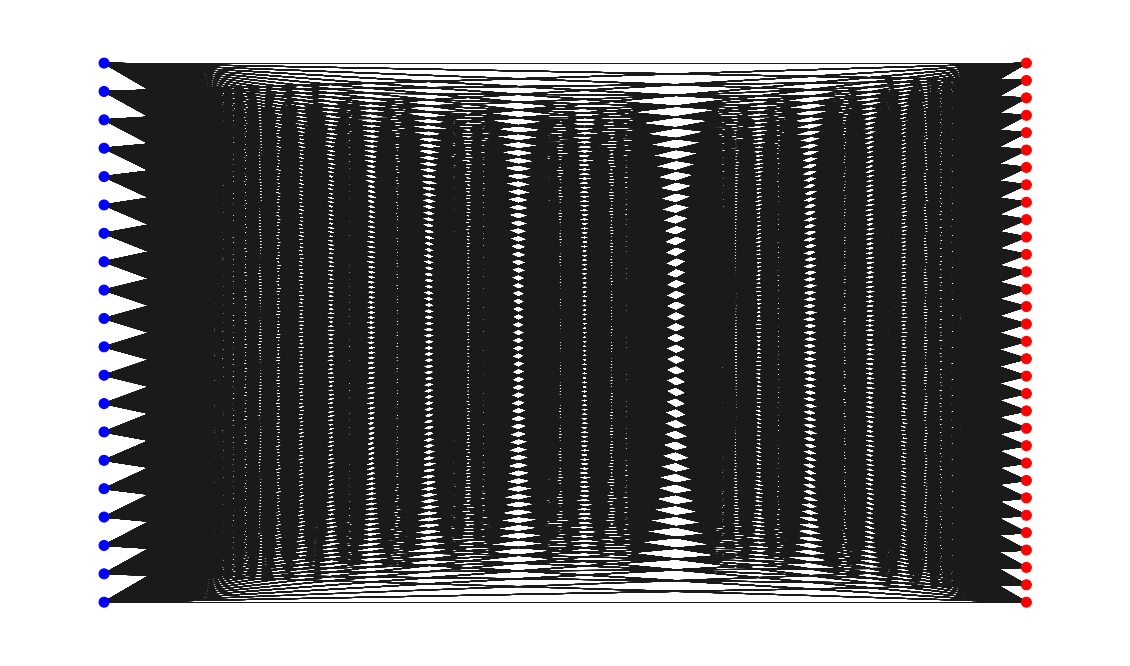

In [477]:
pos = nx.bipartite_layout(G, nodes=wallets)
color_map = {'nft': 'red', 'wallet': 'blue'}
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, \
                 pos, \
                 node_size = 100, \
                 node_color=[color_map[node[1]['node_type']] for node in G.nodes(data=True)], \
                 alpha = 1, \
                 with_labels=False)
plt.axis('off')
plt.savefig('Whale_bipartide_node_to_nfts.png')

In [478]:
mv python/Whale_bipartide_node_to_nfts.png "/Users/haaroony/OneDrive - Pometry Ltd/raphtory.github.io/_posts/Whale_bipartide_node_to_nfts.png"

mv: rename python/Whale_bipartide_node_to_nfts.png to /Users/haaroony/OneDrive - Pometry Ltd/raphtory.github.io/_posts/Whale_bipartide_node_to_nfts.png: No such file or directory


##### Whale between their wallets

In [432]:
import networkx as nx
G = nx.DiGraph()
wallets = set([])
for cycle in big_boy:
    prev_buyer = ''
    for trade in cycle['row'][4]['cycle']['sales']:
        to_ = trade['buyer']
        from_ = prev_buyer
        if prev_buyer == '':
            prev_buyer = to_
        if from_ not in G.nodes:
            wallets.add(from_)
            G.add_node(from_, node_type='wallet')
        if to_ not in G.nodes:
            wallets.add(to_)
            G.add_node(to_, node_type='wallet')
        G.add_edge(from_, to_)
print(G.number_of_nodes(), G.number_of_edges())

21 21


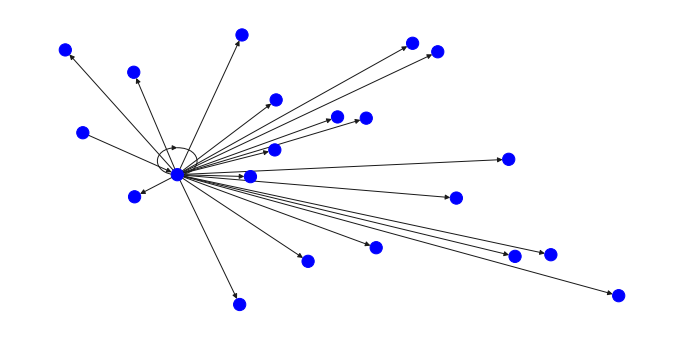

In [434]:
pos = nx.random_layout(G)
color_map = {'nft': 'red', 'wallet': 'blue'}
plt.figure(figsize=(12, 6))
nx.draw_networkx(G, \
                 pos, \
                 node_size = 150, \
                 node_color=[color_map[node[1]['node_type']] for node in G.nodes(data=True)], \
                 alpha = 1, \
                 with_labels=False)
plt.axis('off')
plt.savefig('Whale_bipartide_wallet_to_wallet.png')

In [460]:
G.degree

DiDegreeView({'': 1, '0x8acc1421ec98689461ff5777de8ad6648dc6d643': 22, '0x87b77fabfeb869150b8e1b9462603f9a639c5fae': 1, '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c': 1, '0xbabda06088c242fb2a763aa7cc99706cb77ba735': 1, '0x7316e9cf94bef40d4981d66a5c41c38b6b32454c': 1, '0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04': 1, '0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0': 1, '0xf5aee6d7b838d5ede8aa65d31dbc11116545180c': 1, '0x463215edb66fb6a8f0c979e739a731977617699f': 1, '0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62': 1, '0x6a47b60c377450a460d3eb828d534ee66eead668': 1, '0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee': 1, '0xa21e0974137bf8400eb7dca606d9dcb190d79ed9': 1, '0x236ef21dc36d0aec3990dd5ee84a9d5320644262': 1, '0xe738725cdcc41c91f734dd7b5b9659df994d6dda': 1, '0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8': 1, '0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8': 1, '0x1c1ef71445010114f41ac1feb32dbf5d7281e90f': 1, '0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a': 1, '0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28': 1

##### HIS BROTHERS AND SISTERS?

0x8acc1421ec98689461ff5777de8ad6648dc6d643
{'avg': 2.2519553917404505, 'count': 617, 'total_profit': 1389.456476703858}

0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8
{'avg': 2.19609054383117, 'count': 616, 'total_profit': 1352.7917750000008}

0xa21e0974137bf8400eb7dca606d9dcb190d79ed9
{'avg': 2.3006426628664522, 'count': 614, 'total_profit': 1412.5945950000016}

0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee
{'avg': 2.3572472385620915, 'count': 612, 'total_profit': 1442.6353100000001}

0x1c1ef71445010114f41ac1feb32dbf5d7281e90f
{'avg': 2.3474603371710523, 'count': 608, 'total_profit': 1427.2558849999998}

0x6a47b60c377450a460d3eb828d534ee66eead668
{'avg': 2.2968711341059636, 'count': 604, 'total_profit': 1387.310165000002}

0xe738725cdcc41c91f734dd7b5b9659df994d6dda
{'avg': 2.2413728476821193, 'count': 604, 'total_profit': 1353.7892000000002}

0x463215edb66fb6a8f0c979e739a731977617699f
{'avg': 2.170596011705686, 'count': 598, 'total_profit': 1298.0164150000003}

0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8
{'avg': 2.2783097403685093, 'count': 597, 'total_profit': 1360.1509150000002}

0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c
{'avg': 2.2265507202680044, 'count': 597, 'total_profit': 1329.2507799999985}

0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28
{'avg': 2.260721519524621, 'count': 589, 'total_profit': 1331.5649750000016}

0x236ef21dc36d0aec3990dd5ee84a9d5320644262
{'avg': 2.3027468534482822, 'count': 580, 'total_profit': 1335.5931750000036}

0xf5aee6d7b838d5ede8aa65d31dbc11116545180c
{'avg': 2.279057060869569, 'count': 575, 'total_profit': 1310.4578100000022}

0xbabda06088c242fb2a763aa7cc99706cb77ba735
{'avg': 2.312860959860382, 'count': 573, 'total_profit': 1325.269329999999}

0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a
{'avg': 2.1250271578947357, 'count': 570, 'total_profit': 1211.2654799999993}

0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04
{'avg': 2.152705511463846, 'count': 567, 'total_profit': 1220.5840250000008}

0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0
{'avg': 2.305673079710144, 'count': 552, 'total_profit': 1272.7315399999993}

0x7316e9cf94bef40d4981d66a5c41c38b6b32454c
{'avg': 2.2200820802919665, 'count': 548, 'total_profit': 1216.6049799999976}

0x87b77fabfeb869150b8e1b9462603f9a639c5fae
{'avg': 2.2851332674199623, 'count': 531, 'total_profit': 1213.405765}

0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62
{'avg': 2.2776891950757587, 'count': 528, 'total_profit': 1202.6198950000005}

In [474]:
import random

bro_and_sis = [
'0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8',
'0xa21e0974137bf8400eb7dca606d9dcb190d79ed9',
'0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee',
'0x1c1ef71445010114f41ac1feb32dbf5d7281e90f',
'0x6a47b60c377450a460d3eb828d534ee66eead668',
'0xe738725cdcc41c91f734dd7b5b9659df994d6dda',
'0x463215edb66fb6a8f0c979e739a731977617699f',
'0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8',
'0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c',
'0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28',
'0x236ef21dc36d0aec3990dd5ee84a9d5320644262',
'0xf5aee6d7b838d5ede8aa65d31dbc11116545180c',
'0xbabda06088c242fb2a763aa7cc99706cb77ba735',
'0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a',
'0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04',
'0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0',
'0x7316e9cf94bef40d4981d66a5c41c38b6b32454c',
'0x87b77fabfeb869150b8e1b9462603f9a639c5fae',
'0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62']

print(len(bro_and_sis))

others_sibs = {}
for sibling in bro_and_sis:
    others_sibs[sibling] = []
    for trade in data:
        if '_Rari' in trade['row'][0] or trade['row'][3] <= 2:
            continue
        if trade['row'][4]['buyer'] == sibling:
            others_sibs[sibling].append(trade)
    print(sibling)
    rand = random.choice(range(0,len(others_sibs[sibling])))
    pretty_cycle(others_sibs[sibling][rand]['row'][4]['cycle']['sales'])
    print()

19
0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8
   T(d) 0.0m/0.0h/0.00d, B: 0x00.. $45.38833(0.0) 0x6e77d2d39d08fb68c13451d3bdcb346ab00c5080254dca15d77389858acc0c0d
->T(d) 239.5m/4.0h/0.17d, B: 0xa3.. $45.38833(0.0) 0x29f0ac5fdd2ee06618557ea24a2971e47bfcc083a7d0797a75c2a40fdde5815a
->T(d) 235.9m/3.9h/0.16d, B: 0x17.. $45.38833(0.0) 0xa19dc65f76a4e071f56b762fb3f558d3c1d90969b4752522eb724f23b98e3683
->T(d) 239.7m/4.0h/0.17d, B: 0x73.. $45.38833(0.0) 0xd3f667be68d50ec0592399cabec1e7be7e519561b412cb09038b449bb29f933b
->T(d) 236.2m/3.9h/0.16d, B: 0x1c.. $45.38833(0.0) 0xa1082bfbd5f69b654715819603f00791e9cba5d837c32e75abb5d323e4a88d8d
->T(d) 238.6m/4.0h/0.17d, B: 0xba.. $45.38833(0.0) 0x70ec1cfe9148f270deed23890066d07a05973cbf8099f90d11d2b7c7da592f68
->T(d) 234.9m/3.9h/0.16d, B: 0xcd.. $46.584005(1.1956749999999943) 0x0aeab536dd3e87f84cb5c863d06ffa2d925201d102096a998a1d3730922e972b
->T(d) 241.8m/4.0h/0.17d, B: 0x87.. $46.584005(1.1956749999999943) 0x78f784b0eda3bc826e793101f6fc1d88fbdcb3bcfbf2

### Traders that made the most profits in total

In [ ]:
traders = {}
for x in data:
    buyer = x['row'][4]['buyer']
    if buyer not in traders:
        traders[buyer] = 0
    traders[buyer] += x['row'][4]['profit_usd']
dict(sorted(traders.items(), key=lambda item: item[1], reverse=True))

In [ ]:
{ '0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10': "..",
  '0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea': "metadoge.eth",
  '0xe72eb31b59f85b19499a0f3b3260011894fa0d65': "heeee.eth",
  '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd': "..",
  '0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac': "..",
 '0x59a5493513ba2378ed57ae5ecfb8a027e9d80365': " Sybil Delegate: iamDCinvestor ",
 '0x4a17fd7aa0d240599cf13d670dbde7e124adcfff': "..",
 '0xb1adceddb2941033a090dd166a462fe1c2029484': '0x_b1',
 '0x7a37a180b143bf8b9b3875c0dcdbc6bca5b0050f': '..',
 '0x7397f163f6ef1d5ea97256e9bc081fd89353c3a2': '..',
}

### Traders that made the most profits per cycle on average

In [ ]:
traders = {}
for x in data:
    buyer = x['row'][4]['buyer']
    if buyer not in traders:
        traders[buyer] = {'profit_usd': 0, 'counter':0, 'cycles':[]}
    traders[buyer]['profit_usd'] += x['row'][4]['profit_usd']
    traders[buyer]['counter']+=1
    traders[buyer]['cycles'].append(x['row'][4]['cycle'])
for t in traders.keys():
    traders[t]['average']= traders[t]['profit_usd']/traders[t]['counter']

sorted_traders_average = dict(sorted(traders.items(), key=lambda item: item[1]['average'], reverse=True))
i=0
for k,v in sorted_traders_average.items():
    i+=1
    if i > 10:
        break
    for sale in v['cycles']:
        print("Trader (%s), %i Trades, %i Trades, Profit %.3f" % (k, v['counter'], len(sale['sales']), v['profit_usd'] ) )
            

In [ ]:
sorted_traders_average['0xeca5ac6bad45c1128981d5a78baafec3a1e471d9']

In [ ]:
sorted_traders_average['0xeca5ac6bad45c1128981d5a78baafec3a1e471d9']['cycles'][0]

In [ ]:
sorted_traders_average['0xeca5ac6bad45c1128981d5a78baafec3a1e471d9']['cycles'][1]

### NFT that had been cycled the most?

In [ ]:
'CycleData(0xe748f643b9b5debe0a025e118512be787e5a1ea8'[10:]